
# Cleaning Draft dataset


In this notebook, we will be cleaning the draft dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Load the dataset
draftData = pd.read_csv("../data/raw/draft_data/draft_data.csv")
draftData 


,PERSON_ID,PLAYER_NAME,SEASON,ROUND_NUMBER,ROUND_PICK,OVERALL_PICK,DRAFT_TYPE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,ORGANIZATION,ORGANIZATION_TYPE,PLAYER_PROFILE_FLAG
0,1641705,Victor Wembanyama,2023,1,1,1,Draft,1610612759,San Antonio,Spurs,SAS,Metropolitans 92 (France),Other Team/Club,1
1,1641706,Brandon Miller,2023,1,2,2,Draft,1610612766,Charlotte,Hornets,CHA,Alabama,College/University,1
2,1630703,Scoot Henderson,2023,1,3,3,Draft,1610612757,Portland,Trail Blazers,POR,Ignite (G League),Other Team/Club,1
3,1641708,Amen Thompson,2023,1,4,4,Draft,1610612745,Houston,Rockets,HOU,Overtime Elite,Other Team/Club,1
4,1641709,Ausar Thompson,2023,1,5,5,Draft,1610612765,Detroit,Pistons,DET,Overtime Elite,Other Team/Club,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8252,79312,Herb Wilkinson,1947,0,0,0,Draft,1610610034,St. Louis,Bombers,BOM,Iowa,College/University,0
8253,79284,Jack Stone,1947,0,0,0,Draft,1610610025,Chicago,Stags,CHS,Kansas State,College/University,0
8254,79313,Frank Broyles,1947,0,0,0,Draft,1610610035,Toronto,Huskies,HUS,Georgia Tech,College/University,0
8255,79283,Hank Decker,1947,0,0,0,Draft,1610610025,Chicago,Stags,CHS,West Texas A&M,College/University,0


The data looks clean, on first inspections of the dataframe. We can also see that the data goes from the 2023 draft, which is the latest draft, to 1947. Lets further inspect the dataset and clean it:

In [3]:
draftData.columns

Index(['PERSON_ID', 'PLAYER_NAME', 'SEASON', 'ROUND_NUMBER', 'ROUND_PICK',
       'OVERALL_PICK', 'DRAFT_TYPE', 'TEAM_ID', 'TEAM_CITY', 'TEAM_NAME',
       'TEAM_ABBREVIATION', 'ORGANIZATION', 'ORGANIZATION_TYPE',
       'PLAYER_PROFILE_FLAG'],
      dtype='object')

Above are the columns for the dataset, it's important to know what data and what type of values we are dealing with. Let's look at the amount of rows and columns in the dataframe:

In [4]:
print("Number of rows:", draftData.shape[0])
print("Number of columns:", draftData.shape[1])


Number of rows: 8257
Number of columns: 14


In [5]:
draftData.head()

,PERSON_ID,PLAYER_NAME,SEASON,ROUND_NUMBER,ROUND_PICK,OVERALL_PICK,DRAFT_TYPE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,ORGANIZATION,ORGANIZATION_TYPE,PLAYER_PROFILE_FLAG
0,1641705,Victor Wembanyama,2023,1,1,1,Draft,1610612759,San Antonio,Spurs,SAS,Metropolitans 92 (France),Other Team/Club,1
1,1641706,Brandon Miller,2023,1,2,2,Draft,1610612766,Charlotte,Hornets,CHA,Alabama,College/University,1
2,1630703,Scoot Henderson,2023,1,3,3,Draft,1610612757,Portland,Trail Blazers,POR,Ignite (G League),Other Team/Club,1
3,1641708,Amen Thompson,2023,1,4,4,Draft,1610612745,Houston,Rockets,HOU,Overtime Elite,Other Team/Club,1
4,1641709,Ausar Thompson,2023,1,5,5,Draft,1610612765,Detroit,Pistons,DET,Overtime Elite,Other Team/Club,1


The data head looks pretty clean, it's also accurate information, as Victor Wembanyama was a highly anticipated draft for this season and ended up going second in the draft.

In [6]:
draftData.tail()

,PERSON_ID,PLAYER_NAME,SEASON,ROUND_NUMBER,ROUND_PICK,OVERALL_PICK,DRAFT_TYPE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,ORGANIZATION,ORGANIZATION_TYPE,PLAYER_PROFILE_FLAG
8252,79312,Herb Wilkinson,1947,0,0,0,Draft,1610610034,St. Louis,Bombers,BOM,Iowa,College/University,0
8253,79284,Jack Stone,1947,0,0,0,Draft,1610610025,Chicago,Stags,CHS,Kansas State,College/University,0
8254,79313,Frank Broyles,1947,0,0,0,Draft,1610610035,Toronto,Huskies,HUS,Georgia Tech,College/University,0
8255,79283,Hank Decker,1947,0,0,0,Draft,1610610025,Chicago,Stags,CHS,West Texas A&M,College/University,0
8256,76773,Harry Gallatin,1947,0,0,0,Draft,1610610024,Baltimore,Bullets,BAL,Truman State,College/University,1


In [7]:
draftData.dtypes

PERSON_ID               int64
PLAYER_NAME            object
SEASON                  int64
ROUND_NUMBER            int64
ROUND_PICK              int64
OVERALL_PICK            int64
DRAFT_TYPE             object
TEAM_ID                 int64
TEAM_CITY              object
TEAM_NAME              object
TEAM_ABBREVIATION      object
ORGANIZATION           object
ORGANIZATION_TYPE      object
PLAYER_PROFILE_FLAG     int64
dtype: object

Let us now inspect if there is  missing values, if there are any missing values, then we will remove them.

In [8]:
# Check for missing values
print(draftData.isnull().sum())

PERSON_ID               0
PLAYER_NAME             0
SEASON                  0
ROUND_NUMBER            0
ROUND_PICK              0
OVERALL_PICK            0
DRAFT_TYPE              0
TEAM_ID                 0
TEAM_CITY               0
TEAM_NAME               0
TEAM_ABBREVIATION       0
ORGANIZATION           20
ORGANIZATION_TYPE      20
PLAYER_PROFILE_FLAG     0
dtype: int64


In [9]:
# Create a boolean mask to identify null values
null_mask = draftData.isnull()

# Filter the DataFrame to get rows with null values
rows_with_null = draftData[null_mask.any(axis=1)]

rows_with_null

,PERSON_ID,PLAYER_NAME,SEASON,ROUND_NUMBER,ROUND_PICK,OVERALL_PICK,DRAFT_TYPE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,ORGANIZATION,ORGANIZATION_TYPE,PLAYER_PROFILE_FLAG
331,1629011,Mitchell Robinson,2018,2,6,36,Draft,1610612752,New York,Knicks,NYK,NaN,NaN,1
425,1627748,Thon Maker,2016,1,10,10,Draft,1610612749,Milwaukee,Bucks,MIL,NaN,NaN,1
6108,80797,Dick Harris,1968,16,4,193,Draft,1610612758,Cincinnati,Royals,CIN,NaN,NaN,0
6126,80802,Jay Reffords,1968,19,4,211,Draft,1610612758,Cincinnati,Royals,CIN,NaN,NaN,0
6504,80540,Dave Hicks,1965,15,1,101,Draft,1610612764,Baltimore,Bullets,BLT,NaN,NaN,0
7264,79997,Ed Romanoff,1957,13,1,82,Draft,1610612737,St. Louis,Hawks,STL,NaN,NaN,0
7266,79949,Jerry Gibson,1957,0,0,0,Draft,1610612744,Philadelphia,Warriors,PHW,NaN,NaN,0
7439,79867,Joe Fitt,1955,0,0,0,Draft,1610612737,St. Louis,Hawks,STL,NaN,NaN,0
7552,79746,John Glinski,1954,12,2,98,Draft,1610612744,Philadelphia,Warriors,PHW,NaN,NaN,0
7603,79672,Edward Walsh,1953,0,0,0,Draft,1610610024,Baltimore,Bullets,BAL,NaN,NaN,0


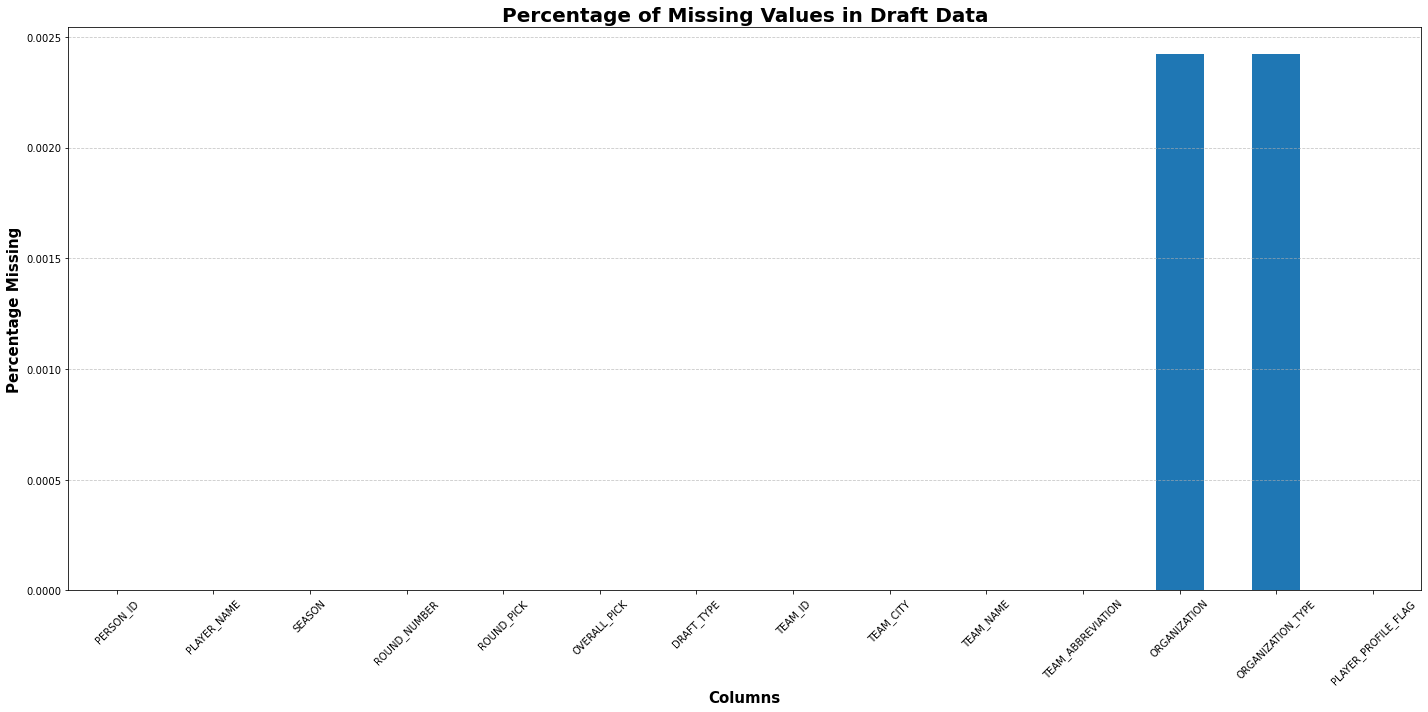

In [10]:
plt.figure(figsize=(20, 10)) 
plot = draftData.isna().mean().plot(kind='bar')
plot.set_title('Percentage of Missing Values in Draft Data', fontweight='bold', fontsize=20)
plot.set_xlabel('Columns', fontweight='bold', fontsize=15)
plot.set_ylabel('Percentage Missing', fontweight='bold', fontsize=15)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Lets drop the rows with null values:

In [11]:
draftData.dropna(inplace=True)


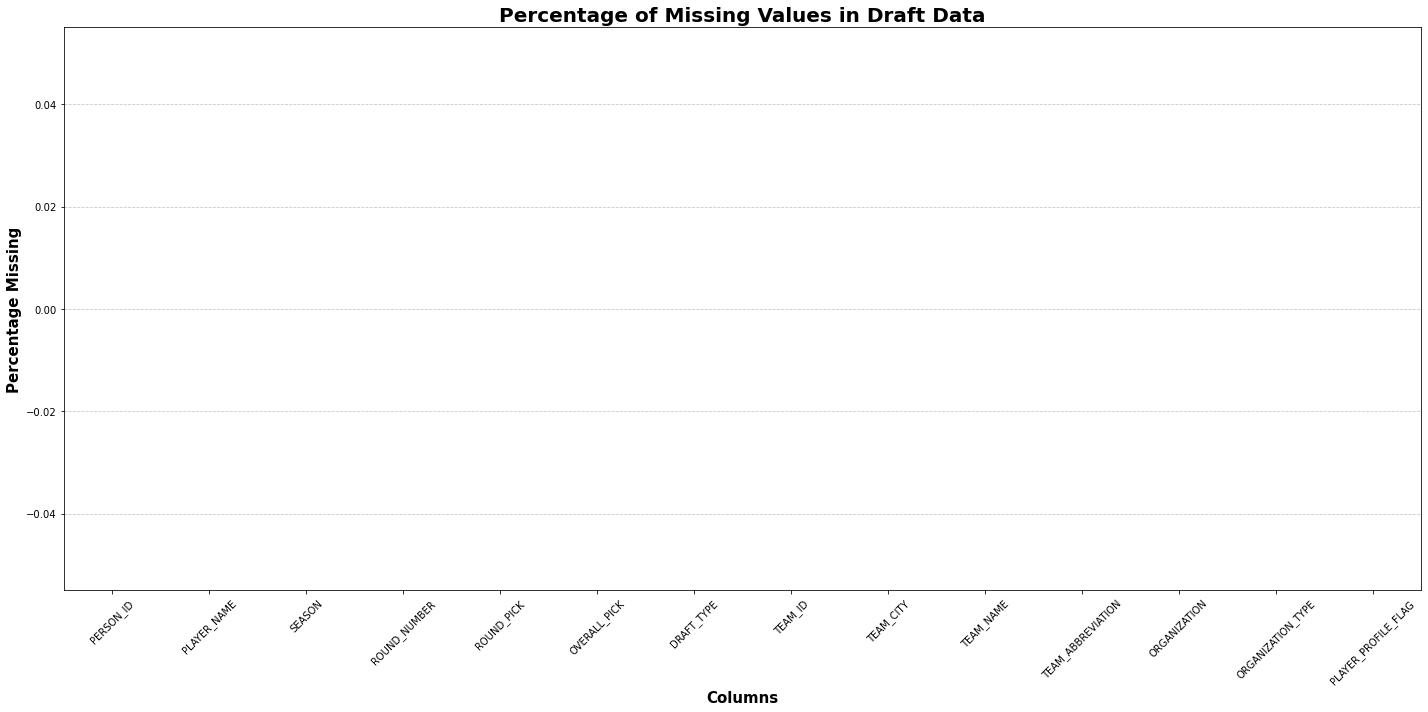

In [12]:
plt.figure(figsize=(20, 10)) 
plot = draftData.isna().mean().plot(kind='bar')
plot.set_title('Percentage of Missing Values in Draft Data', fontweight='bold', fontsize=20)
plot.set_xlabel('Columns', fontweight='bold', fontsize=15)
plot.set_ylabel('Percentage Missing', fontweight='bold', fontsize=15)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
duplicates = draftData.duplicated()
print("There are %d duplicate rows in the dataset" % duplicates.sum())

There are 0 duplicate rows in the dataset


Since we will only be analysing our research questions on stats after 1996, lets condense the dataset to only include rows 1996 onwards :

In [14]:
filtered_draftData = draftData[draftData['SEASON']>=1996].copy()

In [15]:
filtered_draftData

,PERSON_ID,PLAYER_NAME,SEASON,ROUND_NUMBER,ROUND_PICK,OVERALL_PICK,DRAFT_TYPE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,ORGANIZATION,ORGANIZATION_TYPE,PLAYER_PROFILE_FLAG
0,1641705,Victor Wembanyama,2023,1,1,1,Draft,1610612759,San Antonio,Spurs,SAS,Metropolitans 92 (France),Other Team/Club,1
1,1641706,Brandon Miller,2023,1,2,2,Draft,1610612766,Charlotte,Hornets,CHA,Alabama,College/University,1
2,1630703,Scoot Henderson,2023,1,3,3,Draft,1610612757,Portland,Trail Blazers,POR,Ignite (G League),Other Team/Club,1
3,1641708,Amen Thompson,2023,1,4,4,Draft,1610612745,Houston,Rockets,HOU,Overtime Elite,Other Team/Club,1
4,1641709,Ausar Thompson,2023,1,5,5,Draft,1610612765,Detroit,Pistons,DET,Overtime Elite,Other Team/Club,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,1000,Shandon Anderson,1996,2,25,54,Draft,1610612762,Utah,Jazz,UTA,Georgia,College/University,1
1652,1001,Ronnie Henderson,1996,2,26,55,Draft,1610612764,Washington,Bullets,WAS,Louisiana State,College/University,0
1653,1002,Reggie Geary,1996,2,27,56,Draft,1610612739,Cleveland,Cavaliers,CLE,Arizona,College/University,1
1654,1003,Drew Barry,1996,2,28,57,Draft,1610612760,Seattle,SuperSonics,SEA,Georgia Tech,College/University,1


In [16]:
filtered_draftData.columns

Index(['PERSON_ID', 'PLAYER_NAME', 'SEASON', 'ROUND_NUMBER', 'ROUND_PICK',
       'OVERALL_PICK', 'DRAFT_TYPE', 'TEAM_ID', 'TEAM_CITY', 'TEAM_NAME',
       'TEAM_ABBREVIATION', 'ORGANIZATION', 'ORGANIZATION_TYPE',
       'PLAYER_PROFILE_FLAG'],
      dtype='object')

We'll also change all columns to lowercase to keep it consistent with the rest of the datasets that we have :

In [17]:
column_mapping = {
   
    'PERSON_ID' : 'player_id',
    'PLAYER_NAME' : 'player_name', 
    'SEASON' : 'season', 
    'ROUND_NUMBER' : 'round_number', 
    'ROUND_PICK' : 'round_pick',
    'OVERALL_PICK' : 'overall_pick', 
    'DRAFT_TYPE' : 'draft_type', 
    'TEAM_ID' : 'team_id', 
    'TEAM_CITY' : 'team_city', 
    'TEAM_NAME' : 'team_nickname',
    'TEAM_ABBREVIATION' : 'team_abbreviation', 
    'ORGANIZATION' : 'organization', 
    'ORGANIZATION_TYPE' : 'organization_type',
    'PLAYER_PROFILE_FLAG' : 'player_profile_flag' 
}

In [18]:
filtered_draftData.rename(columns=column_mapping, inplace=True)

In [19]:
filtered_draftData

,player_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_nickname,team_abbreviation,organization,organization_type,player_profile_flag
0,1641705,Victor Wembanyama,2023,1,1,1,Draft,1610612759,San Antonio,Spurs,SAS,Metropolitans 92 (France),Other Team/Club,1
1,1641706,Brandon Miller,2023,1,2,2,Draft,1610612766,Charlotte,Hornets,CHA,Alabama,College/University,1
2,1630703,Scoot Henderson,2023,1,3,3,Draft,1610612757,Portland,Trail Blazers,POR,Ignite (G League),Other Team/Club,1
3,1641708,Amen Thompson,2023,1,4,4,Draft,1610612745,Houston,Rockets,HOU,Overtime Elite,Other Team/Club,1
4,1641709,Ausar Thompson,2023,1,5,5,Draft,1610612765,Detroit,Pistons,DET,Overtime Elite,Other Team/Club,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,1000,Shandon Anderson,1996,2,25,54,Draft,1610612762,Utah,Jazz,UTA,Georgia,College/University,1
1652,1001,Ronnie Henderson,1996,2,26,55,Draft,1610612764,Washington,Bullets,WAS,Louisiana State,College/University,0
1653,1002,Reggie Geary,1996,2,27,56,Draft,1610612739,Cleveland,Cavaliers,CLE,Arizona,College/University,1
1654,1003,Drew Barry,1996,2,28,57,Draft,1610612760,Seattle,SuperSonics,SEA,Georgia Tech,College/University,1


As we saw in the game data (refer to `clean_team_games_data`) teams may have had different names in older seasons so we'll change them to their current names :

In [20]:
# renaming nicknames of teams 

teams_with_nickname_id = filtered_draftData.groupby('team_id')['team_nickname'].unique()
teams_to_rename = teams_with_nickname_id[teams_with_nickname_id.apply(len) > 1]
teams_to_rename

team_id
1610612740       [Pelicans, Hornets]
1610612760    [Thunder, SuperSonics]
1610612764        [Wizards, Bullets]
1610612766        [Hornets, Bobcats]
Name: team_nickname, dtype: object

In [21]:
nickname_map = {
    1610612740: 'Pelicans',
    1610612760: 'Thunder',
    1610612764: 'Wizards',
    1610612766: 'Hornets'
}

In [22]:
filtered_draftData=filtered_draftData.copy()
filtered_draftData['team_nickname'] = filtered_draftData.apply(lambda x: nickname_map.get(x['team_id'], x['team_nickname']), axis=1)

In [23]:
len(filtered_draftData['team_nickname'].unique())

30

In [24]:
# similarly, renaming team_city column 

teams_city_id = filtered_draftData.groupby('team_id')['team_city'].unique()
teams_to_rename = teams_city_id[teams_city_id.apply(len) > 1]
teams_to_rename

team_id
1610612740    [New Orleans, New Orleans/Oklahoma City]
1610612746                           [LA, Los Angeles]
1610612751                      [Brooklyn, New Jersey]
1610612760                    [Oklahoma City, Seattle]
1610612763                        [Memphis, Vancouver]
Name: team_city, dtype: object

In [25]:
teamcity_map = {
    1610612740: 'New Orleans',
    1610612746: 'Los Angeles',
    1610612751: 'Brooklyn',
    1610612760: 'Oklahoma City',
    1610612763: 'Memphis'
}

In [26]:
filtered_draftData=filtered_draftData.copy()
filtered_draftData['team_city'] = filtered_draftData.apply(lambda x: teamcity_map.get(x['team_id'], x['team_city']), axis=1)

In [27]:
len(filtered_draftData['team_city'].unique())

29

This is accurate since 'LA' has 2 teams 'Lakers' and 'Clippers' so the team_city is the same for both teams, hence why there are 29 team cities

We will also have to rename the team_abbreviation column accordingly :

In [28]:
teams_abbrev_id = filtered_draftData.groupby('team_id')['team_abbreviation'].unique()
teams_to_rename = teams_abbrev_id[teams_abbrev_id.apply(len) > 1]
teams_to_rename

team_id
1610612740    [NOP, NOH, NOK]
1610612751         [BKN, NJN]
1610612760         [OKC, SEA]
1610612763         [MEM, VAN]
1610612766         [CHA, CHH]
Name: team_abbreviation, dtype: object

In [29]:
abbrev_map = {
    1610612740: 'NOP',
    1610612751: 'BKN',
    1610612760: 'OKC',
    1610612763: 'MEM',
    1610612766: 'CHA',
}

In [30]:
filtered_draftData=filtered_draftData.copy()
filtered_draftData['team_abbreviation'] = filtered_draftData.apply(lambda x: abbrev_map.get(x['team_id'], x['team_abbreviation']), axis=1)

In [31]:
len(filtered_draftData['team_abbreviation'].unique())

30

We can now make a separate column for the full team name by concatenating 'team_city' and 'team_nickname' column :

In [32]:
filtered_draftData['team_name'] = filtered_draftData['team_city'] + ' ' + filtered_draftData['team_nickname'] 

In [35]:
filtered_draftData.head(10)

,player_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_nickname,team_abbreviation,organization,organization_type,player_profile_flag,team_name
0,1641705,Victor Wembanyama,2023,1,1,1,Draft,1610612759,San Antonio,Spurs,SAS,Metropolitans 92 (France),Other Team/Club,1,San Antonio Spurs
1,1641706,Brandon Miller,2023,1,2,2,Draft,1610612766,Charlotte,Hornets,CHA,Alabama,College/University,1,Charlotte Hornets
2,1630703,Scoot Henderson,2023,1,3,3,Draft,1610612757,Portland,Trail Blazers,POR,Ignite (G League),Other Team/Club,1,Portland Trail Blazers
3,1641708,Amen Thompson,2023,1,4,4,Draft,1610612745,Houston,Rockets,HOU,Overtime Elite,Other Team/Club,1,Houston Rockets
4,1641709,Ausar Thompson,2023,1,5,5,Draft,1610612765,Detroit,Pistons,DET,Overtime Elite,Other Team/Club,1,Detroit Pistons
5,1641710,Anthony Black,2023,1,6,6,Draft,1610612753,Orlando,Magic,ORL,Arkansas,College/University,1,Orlando Magic
6,1641731,Bilal Coulibaly,2023,1,7,7,Draft,1610612754,Indiana,Pacers,IND,Metropolitans 92 (France),Other Team/Club,1,Indiana Pacers
7,1641716,Jarace Walker,2023,1,8,8,Draft,1610612764,Washington,Wizards,WAS,Houston,College/University,1,Washington Wizards
8,1641707,Taylor Hendricks,2023,1,9,9,Draft,1610612762,Utah,Jazz,UTA,Central Florida,College/University,1,Utah Jazz
9,1641717,Cason Wallace,2023,1,10,10,Draft,1610612742,Dallas,Mavericks,DAL,Kentucky,College/University,1,Dallas Mavericks


In [36]:
len(filtered_draftData['team_name'].unique())

30

# Lets now look at the additional information that we collected on every player :

In [37]:
file= "../data/raw/player_extra_info/player_moreinfo.csv"
player_extrainfo = pd.read_csv(file)

In [38]:
player_extrainfo

,SEASON,PLAYER_ID,FIRST_NAME,LAST_NAME,PLAYER_NAME,POSITION,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,...,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,STANDING_VERTICAL_LEAP,MAX_VERTICAL_LEAP,LANE_AGILITY_TIME,MODIFIED_LANE_AGILITY_TIME,THREE_QUARTER_SPRINT,BENCH_PRESS
0,2002,2403,Nene,NaN,Nene,PF,81.25,6' 9.25'',NaN,NaN,...,9' 1'',NaN,NaN,NaN,30.0,34.0,10.73,NaN,3.19,16.0
1,2021,1630546,Max,Abmas,Max Abmas,PG,70.50,5'10.5'',71.75,5'11.75'',...,7'10.0'',5.50,8.0,7.75,28.5,32.5,10.90,3.49,3.12,NaN
2,2007,12204,Mohamed,Abukar,Mohamed Abukar,SF,80.00,6' 8'',81.75,6' 9.75'',...,8' 7'',8.90,NaN,NaN,30.5,35.0,11.78,NaN,3.37,15.0
3,2020,1630173,Precious,Achiuwa,Precious Achiuwa,PF,79.50,6'7.50'',80.70,6'8.75'',...,9'0.50'',6.70,9.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN
4,2005,101165,Alex,Acker,Alex Acker,SG,75.75,6' 3.75'',76.75,6' 4.75'',...,8' 6.5'',NaN,NaN,NaN,28.0,32.0,11.67,NaN,3.35,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,2012,203092,Tyler,Zeller,Tyler Zeller,PF-C,83.25,6' 11.25'',84.50,7' 0.5'',...,8' 8.5'',6.40,9.0,9.75,30.0,34.0,11.13,NaN,3.40,16.0
1629,2013,203469,Cody,Zeller,Cody Zeller,C-PF,82.75,6' 10.75'',84.25,7' 0.25'',...,8' 10'',4.75,8.5,10.50,35.5,37.5,10.82,2.69,3.15,17.0
1630,2022,1630855,Fanbo,Zeng,Fanbo Zeng,SF-PF,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1631,2016,1627757,Stephen,Zimmerman,Stephen Zimmerman,C,82.25,6' 10.25'',83.75,6' 11.75'',...,9' 0.5'',11.15,9.0,9.00,26.0,31.0,12.08,3.16,3.43,NaN


In [168]:
player_extrainfo.columns

Index(['SEASON', 'PLAYER_ID', 'FIRST_NAME', 'LAST_NAME', 'PLAYER_NAME',
       'POSITION', 'HEIGHT_WO_SHOES', 'HEIGHT_WO_SHOES_FT_IN',
       'HEIGHT_W_SHOES', 'HEIGHT_W_SHOES_FT_IN', 'WEIGHT', 'WINGSPAN',
       'WINGSPAN_FT_IN', 'STANDING_REACH', 'STANDING_REACH_FT_IN',
       'BODY_FAT_PCT', 'HAND_LENGTH', 'HAND_WIDTH', 'STANDING_VERTICAL_LEAP',
       'MAX_VERTICAL_LEAP', 'LANE_AGILITY_TIME', 'MODIFIED_LANE_AGILITY_TIME',
       'THREE_QUARTER_SPRINT', 'BENCH_PRESS'],
      dtype='object')

We can drop the first and last name columns since `PLAYER_NAME` is sufficient : 

In [169]:
player_extrainfo.drop(['FIRST_NAME', 'LAST_NAME'], axis=1, inplace=True)

In [170]:
player_extrainfo.columns

Index(['SEASON', 'PLAYER_ID', 'PLAYER_NAME', 'POSITION', 'HEIGHT_WO_SHOES',
       'HEIGHT_WO_SHOES_FT_IN', 'HEIGHT_W_SHOES', 'HEIGHT_W_SHOES_FT_IN',
       'WEIGHT', 'WINGSPAN', 'WINGSPAN_FT_IN', 'STANDING_REACH',
       'STANDING_REACH_FT_IN', 'BODY_FAT_PCT', 'HAND_LENGTH', 'HAND_WIDTH',
       'STANDING_VERTICAL_LEAP', 'MAX_VERTICAL_LEAP', 'LANE_AGILITY_TIME',
       'MODIFIED_LANE_AGILITY_TIME', 'THREE_QUARTER_SPRINT', 'BENCH_PRESS'],
      dtype='object')

Lets first rename the columns :

In [171]:
column_map = {

    'SEASON' : 'season', 
    'PLAYER_ID' : 'player_id',  
    'PLAYER_NAME' : 'player_fullname',
    'POSITION' : 'position', 
    'HEIGHT_WO_SHOES' : 'height', 
    'HEIGHT_WO_SHOES_FT_IN' : 'height_ft_in',
    'HEIGHT_W_SHOES' : 'height_shoes', 
    'HEIGHT_W_SHOES_FT_IN' : 'height_shoes_ft_in', 
    'WEIGHT' : 'weight', 
    'WINGSPAN' : 'wingspan',
    'WINGSPAN_FT_IN': 'wingspan_ft_in', 
    'STANDING_REACH' : 'standing_reach', 
    'STANDING_REACH_FT_IN' : 'standing_reach_ft_in',
    'BODY_FAT_PCT' : 'body_fat_pct', 
    'HAND_LENGTH' : 'hand_length', 
    'HAND_WIDTH' : 'hand_width', 
    'STANDING_VERTICAL_LEAP' : 'standing_vertical_leap',
    'MAX_VERTICAL_LEAP' : 'max_vertical_leap', 
    'LANE_AGILITY_TIME' : 'lane_agility_time', 
    'MODIFIED_LANE_AGILITY_TIME' : 'modified_lane_agility_time',
    'THREE_QUARTER_SPRINT' : 'three_quarter_sprint', 
    'BENCH_PRESS' : 'bench_press'
    
}

In [172]:
player_extrainfo = player_extrainfo.rename(columns=column_map)

In [173]:
player_extrainfo.columns

Index(['season', 'player_id', 'player_fullname', 'position', 'height',
       'height_ft_in', 'height_shoes', 'height_shoes_ft_in', 'weight',
       'wingspan', 'wingspan_ft_in', 'standing_reach', 'standing_reach_ft_in',
       'body_fat_pct', 'hand_length', 'hand_width', 'standing_vertical_leap',
       'max_vertical_leap', 'lane_agility_time', 'modified_lane_agility_time',
       'three_quarter_sprint', 'bench_press'],
      dtype='object')

In [174]:
player_extrainfo.head(10)

,season,player_id,player_fullname,position,height,height_ft_in,height_shoes,height_shoes_ft_in,weight,wingspan,...,standing_reach_ft_in,body_fat_pct,hand_length,hand_width,standing_vertical_leap,max_vertical_leap,lane_agility_time,modified_lane_agility_time,three_quarter_sprint,bench_press
0,2002,2403,Nene,PF,81.25,6' 9.25'',NaN,NaN,253.0,88.50,...,9' 1'',NaN,NaN,NaN,30.0,34.0,10.73,NaN,3.19,16.0
1,2021,1630546,Max Abmas,PG,70.50,5'10.5'',71.75,5'11.75'',161.8,73.75,...,7'10.0'',5.50,8.0,7.75,28.5,32.5,10.90,3.49,3.12,NaN
2,2007,12204,Mohamed Abukar,SF,80.00,6' 8'',81.75,6' 9.75'',210.0,81.00,...,8' 7'',8.90,NaN,NaN,30.5,35.0,11.78,NaN,3.37,15.0
3,2020,1630173,Precious Achiuwa,PF,79.50,6'7.50'',80.70,6'8.75'',234.0,84.75,...,9'0.50'',6.70,9.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN
4,2005,101165,Alex Acker,SG,75.75,6' 3.75'',76.75,6' 4.75'',183.0,84.00,...,8' 6.5'',NaN,NaN,NaN,28.0,32.0,11.67,NaN,3.35,11.0
5,2012,203112,Quincy Acy,PF,78.50,6' 6.5'',79.75,6' 7.75'',223.8,86.75,...,8' 10.5'',7.10,9.5,11.00,32.0,37.0,10.48,NaN,3.28,13.0
6,2014,203919,Jordan Adams,SG,75.50,6' 3.5'',76.75,6' 4.75'',208.8,82.00,...,8' 6'',10.80,8.5,7.50,24.5,29.5,12.13,3.05,3.50,NaN
7,2013,203500,Steven Adams,C,82.75,6' 10.75'',84.00,7' 0'',254.5,88.50,...,9' 1.5'',6.65,9.5,11.00,28.5,33.0,11.85,3.02,3.40,16.0
8,2017,1628389,Edrice Adebayo,PF-C,80.75,6' 8.75'',75.75,6' 9.75'',242.6,86.75,...,9' 0'',5.20,9.5,8.75,33.5,38.5,11.94,3.24,3.24,12.0
9,2006,12123,Kenny Adeleke,PF-C,78.50,6' 6.5'',79.75,6' 7.75'',250.0,82.25,...,8' 8'',10.50,NaN,NaN,28.5,30.5,11.57,NaN,3.47,26.0


To answer our research question on drafts better, we will merge the draft data with this one (based on `player_id`) which will give us a broader range of stats to work with :

In [175]:
filtered_draftData = filtered_draftData.merge(player_extrainfo, on='player_id')

In [176]:
filtered_draftData.columns

Index(['player_id', 'player_name', 'season_x', 'round_number', 'round_pick',
       'overall_pick', 'draft_type', 'team_id', 'team_city', 'team_nickname',
       'team_abbreviation', 'organization', 'organization_type',
       'player_profile_flag', 'team_name', 'season_y', 'player_fullname',
       'position', 'height', 'height_ft_in', 'height_shoes',
       'height_shoes_ft_in', 'weight', 'wingspan', 'wingspan_ft_in',
       'standing_reach', 'standing_reach_ft_in', 'body_fat_pct', 'hand_length',
       'hand_width', 'standing_vertical_leap', 'max_vertical_leap',
       'lane_agility_time', 'modified_lane_agility_time',
       'three_quarter_sprint', 'bench_press'],
      dtype='object')

As we can see, 'season' and 'player_name' columns are duplicated so we'll remove one column for each of these :

In [177]:
filtered_draftData.drop(columns=['player_fullname', 'season_y'], inplace=True)

In [178]:
filtered_draftData.rename(columns={'season_x': 'season'}, inplace=True)

In [180]:
filtered_draftData.columns

Index(['player_id', 'player_name', 'season', 'round_number', 'round_pick',
       'overall_pick', 'draft_type', 'team_id', 'team_city', 'team_nickname',
       'team_abbreviation', 'organization', 'organization_type',
       'player_profile_flag', 'team_name', 'position', 'height',
       'height_ft_in', 'height_shoes', 'height_shoes_ft_in', 'weight',
       'wingspan', 'wingspan_ft_in', 'standing_reach', 'standing_reach_ft_in',
       'body_fat_pct', 'hand_length', 'hand_width', 'standing_vertical_leap',
       'max_vertical_leap', 'lane_agility_time', 'modified_lane_agility_time',
       'three_quarter_sprint', 'bench_press'],
      dtype='object')

Lets take a look how many 'NaN' values exist in each column :

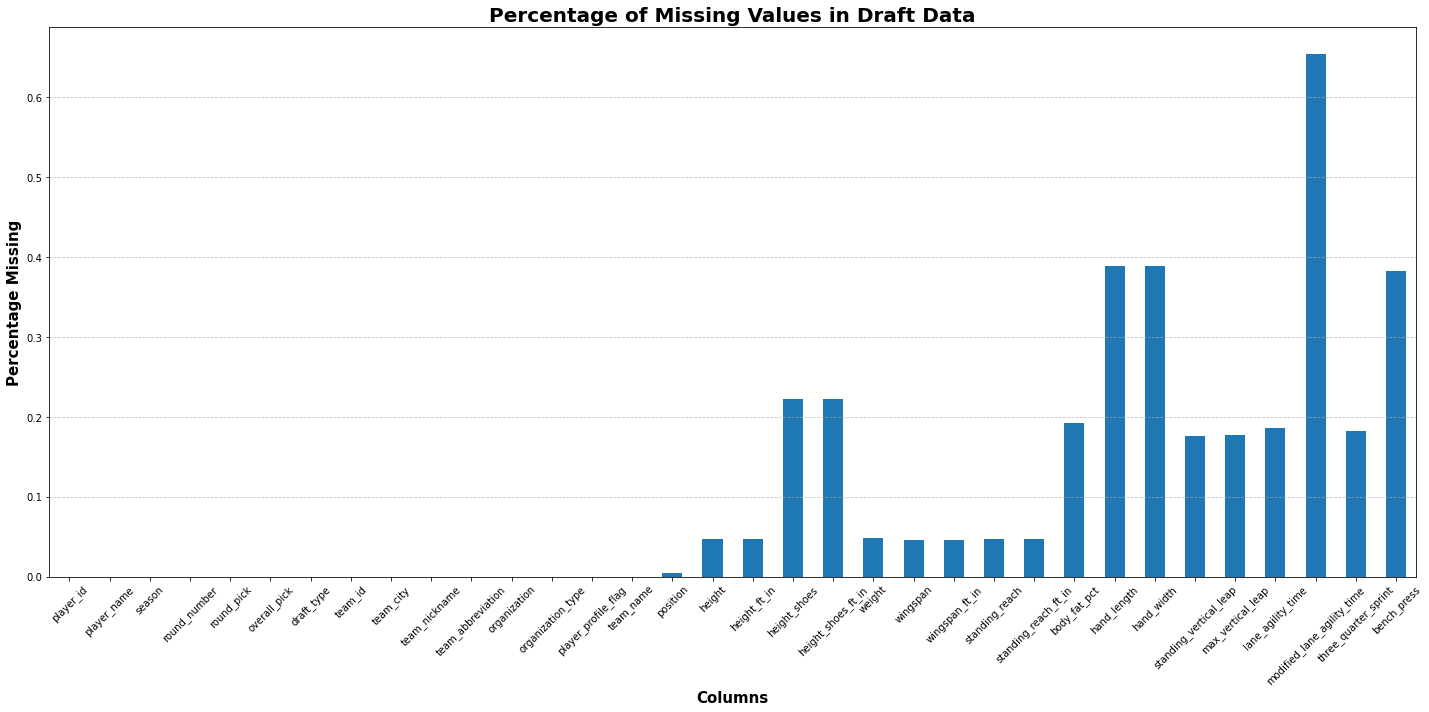

In [181]:
plt.figure(figsize=(20, 10)) 
plot = filtered_draftData.isna().mean().plot(kind='bar')
plot.set_title('Percentage of Missing Values in Draft Data', fontweight='bold', fontsize=20)
plot.set_xlabel('Columns', fontweight='bold', fontsize=15)
plot.set_ylabel('Percentage Missing', fontweight='bold', fontsize=15)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

From the above we can see more than 60% of the values in `lane_agility_time` are missing so we will simply drop this column. There are a few missing stats for every column, however, we will get rid of those rows which dont have any of the important stats (useful for our analysis):

In [ ]:
filtered_draftData.drop(columns=['lane_agility_time'], inplace=True)

In [189]:
missing_rows = filtered_draftData[filtered_draftData[['height', 'weight', 'wingspan']].isna().all(axis=1)]
num_missing_rows = len(missing_rows)

print(f'Number of rows where all specified columns have missing values: {num_missing_rows}')

Number of rows where all specified columns have missing values: 44


In [190]:
filtered_draftData.dropna(subset=['height', 'weight', 'wingspan'], how='all', inplace=True)

In [197]:
filtered_draftData

,player_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_nickname,...,standing_reach,standing_reach_ft_in,body_fat_pct,hand_length,hand_width,standing_vertical_leap,max_vertical_leap,modified_lane_agility_time,three_quarter_sprint,bench_press
3,1641708,Amen Thompson,2023,1,4,4,Draft,1610612745,Houston,Rockets,...,103.5,8' 7.50'',NaN,8.50,8.50,NaN,NaN,NaN,NaN,NaN
4,1641709,Ausar Thompson,2023,1,5,5,Draft,1610612765,Detroit,Pistons,...,104.0,8' 8.00'',NaN,8.75,9.25,NaN,NaN,NaN,NaN,NaN
5,1641710,Anthony Black,2023,1,6,6,Draft,1610612753,Orlando,Magic,...,102.5,8' 6.50'',NaN,8.25,9.50,32.0,39.0,NaN,3.35,NaN
7,1641716,Jarace Walker,2023,1,8,8,Draft,1610612764,Washington,Wizards,...,104.5,8' 8.50'',NaN,9.00,10.00,34.5,38.0,NaN,3.20,NaN
8,1641707,Taylor Hendricks,2023,1,9,9,Draft,1610612762,Utah,Jazz,...,107.0,8' 11.00'',NaN,9.25,10.25,32.5,36.0,NaN,3.32,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,2081,Ernest Brown,2000,2,23,52,Draft,1610612748,Miami,Heat,...,109.5,9' 1.5'',NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
966,2082,Dan McClintock,2000,2,24,53,Draft,1610612743,Denver,Nuggets,...,107.0,8' 11'',NaN,NaN,NaN,33.0,35.0,NaN,3.33,20.0
967,2083,Cory Hightower,2000,2,25,54,Draft,1610612759,San Antonio,Spurs,...,101.5,8' 5.5'',NaN,NaN,NaN,29.5,34.5,NaN,3.37,0.0
968,2084,Chris Porter,2000,2,26,55,Draft,1610612744,Golden State,Warriors,...,103.5,8' 7.5'',NaN,NaN,NaN,28.5,35.0,NaN,3.20,6.0


We can now export the cleaned dataset to a csv file in our clean data directory:

In [198]:
output_dir = os.path.join("..", "data", "cleaned", "draft_data")
os.makedirs(output_dir, exist_ok=True)

output_filename = os.path.join(output_dir, "draft_data.csv")
filtered_draftData.to_csv(output_filename, index=False)